In [44]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

## Return Forecasting: Time Series Analysis & Modelling with CAD-PHY Exchange rate data.

In [26]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("02-Homework_10-Time-Series_Instructions_Starter_Code_cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head(10)

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64
1982-01-12,187.20,187.20,187.20,187.20
1982-01-13,188.35,188.35,188.35,188.35
1982-01-14,187.96,187.96,187.96,187.96
1982-01-15,187.88,187.88,187.88,187.88


In [27]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


## Initial Time-Series Plotting

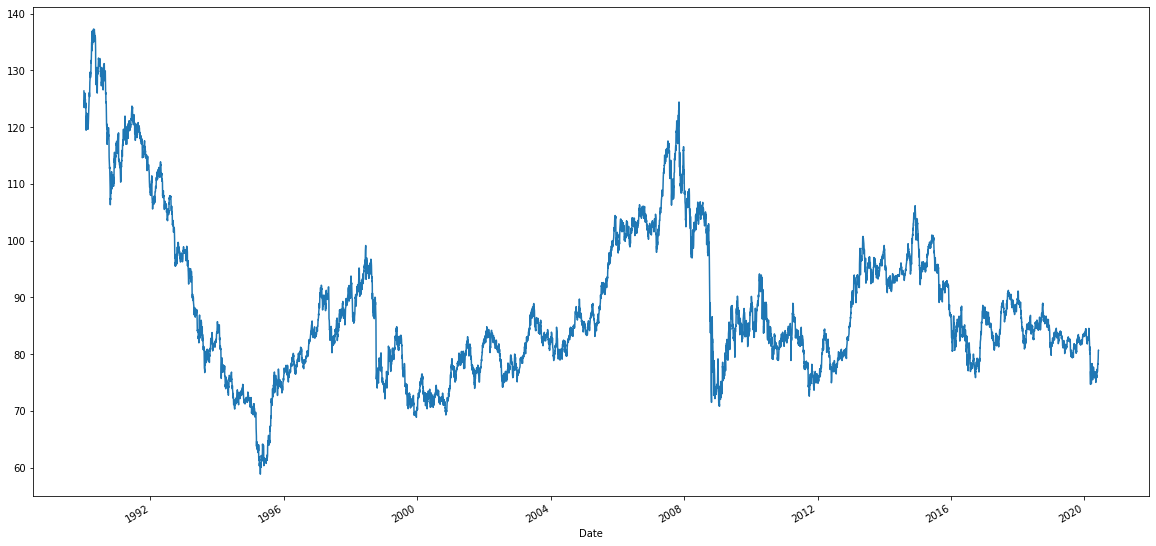

In [28]:
# Plot just the "Price" column from the dataframe:
# YOUR CODE HERE!

cad_jpy_df.Price.plot(figsize=(20, 10))



#### Question: Do you see any patterns, long-term and/or short?

#### On long term basis there is no clear pattern but for short term basis there are some upward and downward trends. 1-3 year consistent trends, but on a daily basis, there are a lot of short-term ups and downs.

## Decomposition Using a Hodrick-Prescott Filter

In [29]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
# YOUR CODE HERE!
ts_noise, ts_trend = sm.tsa.filters.hpfilter(cad_jpy_df['Price'])


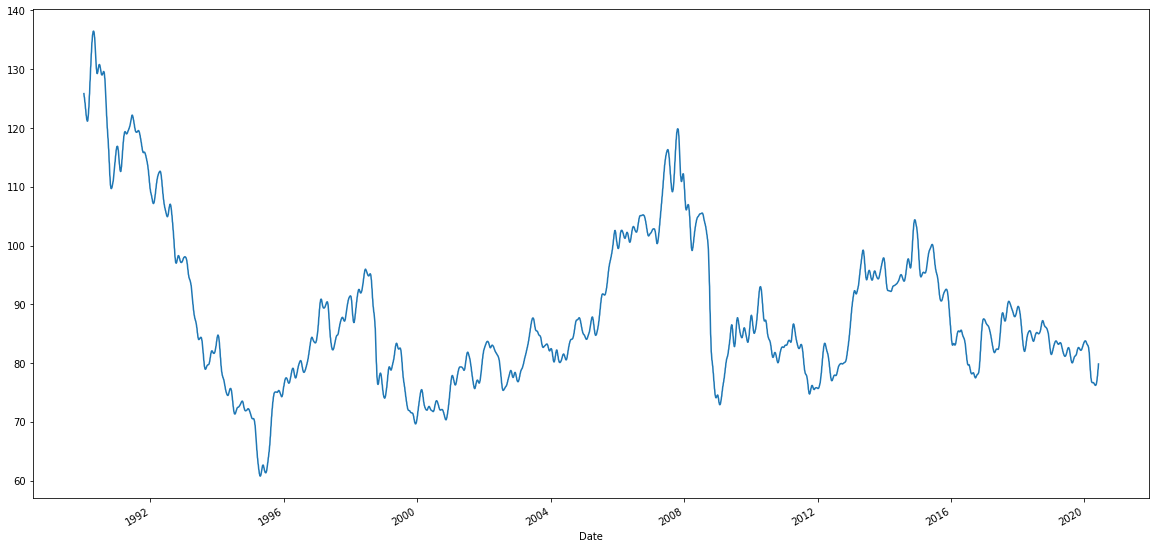

In [30]:
 # Plot the trend
ts_trend.plot(figsize=(20, 10))

In [31]:
ts_trend.head()

Date
1990-01-02    125.850905
1990-01-03    125.679684
1990-01-04    125.508788
1990-01-05    125.338304
1990-01-08    125.167037
Name: Price_trend, dtype: float64

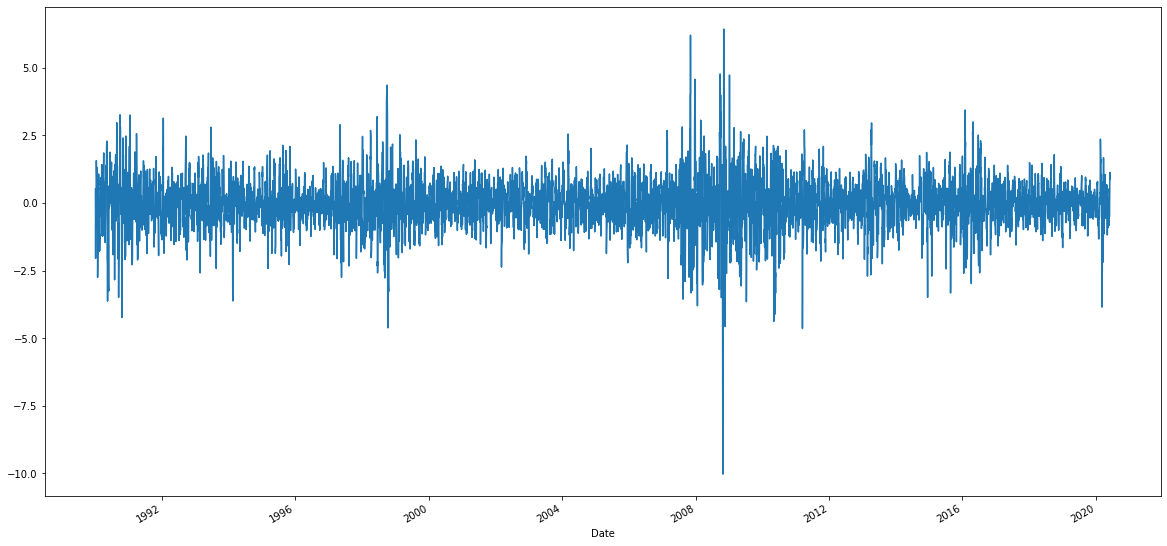

In [32]:
# Plot the noise
ts_noise.plot(figsize=(20, 10))

In [33]:
ts_noise.head()

Date
1990-01-02    0.519095
1990-01-03   -0.379684
1990-01-04   -2.048788
1990-01-05   -0.798304
1990-01-08   -0.897037
Name: Price_cycle, dtype: float64

In [37]:
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:
# YOUR CODE HERE!

cad_jpy_df_new = cad_jpy_df[["Price"]].copy()

cad_jpy_df_new["Noise"] = ts_noise
cad_jpy_df_new["Trend"] = ts_trend
cad_jpy_df_new.head(10)




,Price,Noise,Trend
Date,,,
1990-01-02,126.37,0.519095,125.850905
1990-01-03,125.30,-0.379684,125.679684
1990-01-04,123.46,-2.048788,125.508788
1990-01-05,124.54,-0.798304,125.338304
1990-01-08,124.27,-0.897037,125.167037
1990-01-09,125.10,0.106703,124.993297
1990-01-10,125.81,0.995171,124.814829
1990-01-11,125.85,1.220552,124.629448
1990-01-12,126.00,1.564410,124.435590


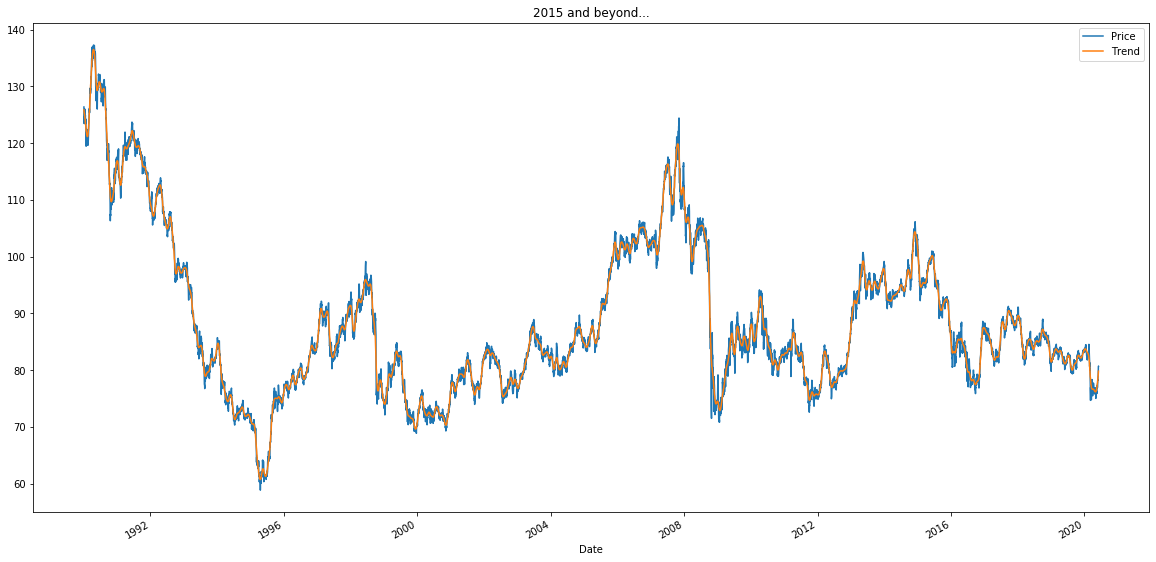

In [56]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
# YOUR CODE HERE!



fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

cad_jpy_df_new[["Price","Trend"]].plot(ax=ax, title="2015 and beyond...")
#plt.show()

#### Question: Do you see any patterns, long-term and/or short?

#### After using the HP Filter for smoothing and plotting the resulting trend against the actual returns, we can see that there's a lot of short term fluctuations that deviate around this trend. Perhaps it represents profitable trading opportunities.

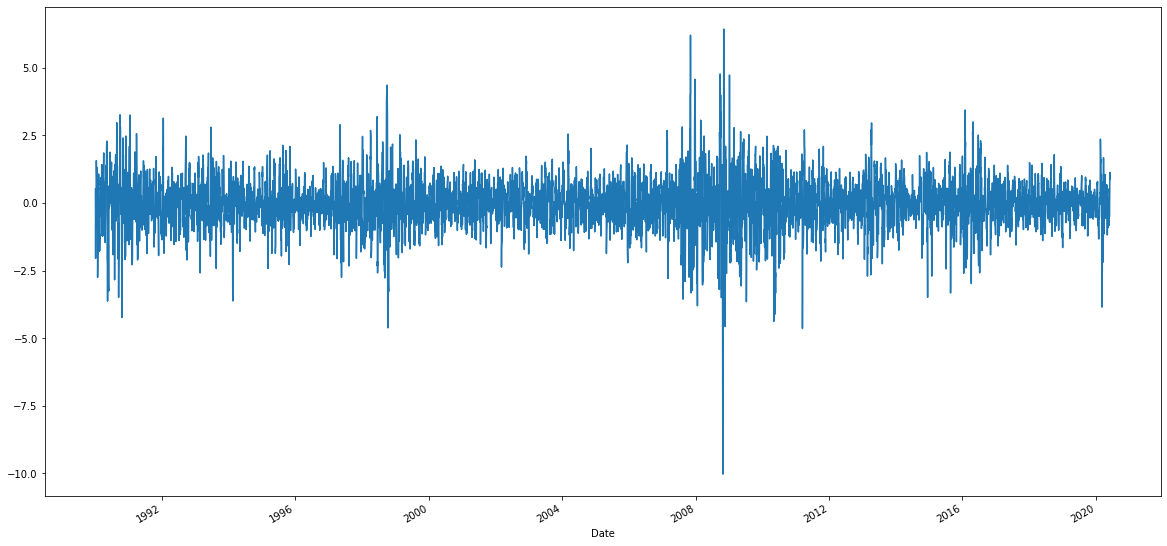

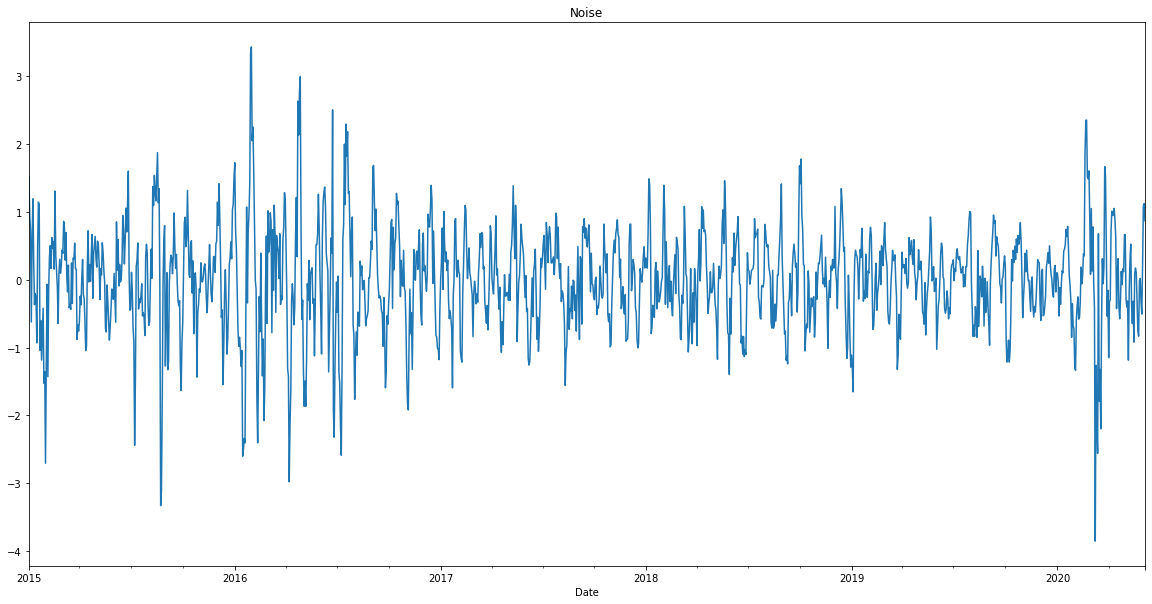

In [94]:
# Plot the Settle Noise
# YOUR CODE HERE!

cad_jpy_df_new["Noise"].plot(figsize=(20,10))
plt.show()

cad_jpy_df_new["Noise"]["2015":].plot(figsize=(20,10), title="Noise")
plt.show()



## Forecasting Returns using an ARMA Model

In [50]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (cad_jpy_df[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


In [62]:
import statsmodels.api as sm

# Estimate and ARMA model using statsmodels (use order=(2, 1))
# YOUR CODE HERE!

from statsmodels.tsa.arima_model import ARMA

model = ARMA(returns.values, order=(2,1))

# Fit the model and assign it to a variable called results
# YOUR CODE HERE!

results = model.fit()

In [63]:
# Output model summary results:
# YOUR CODE HERE!

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7928
Model:                     ARMA(2, 1)   Log Likelihood               -9751.978
Method:                       css-mle   S.D. of innovations              0.828
Date:                Wed, 25 Nov 2020   AIC                          19513.955
Time:                        14:34:15   BIC                          19548.846
Sample:                             0   HQIC                         19525.903
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.009     -0.245      0.807      -0.020       0.016
ar.L1.y       -0.8547      0.164     -5.201      0.000      -1.177      -0.533
ar.L2.y       -0.0197      0.013     -1.475      0.140      -0.046       0.006
ma.L1.y        0.8246      0.164      5.031      0.000       0.503       1.146
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2033           +0.0000j            1.2033            0.5000
AR.2          -42.1688           +0.0000j           42.1688            0.5000
MA.1           -1.2127           +0.0000j            1.2127            0.5000
-----------------------------------------------------------------------------
"""

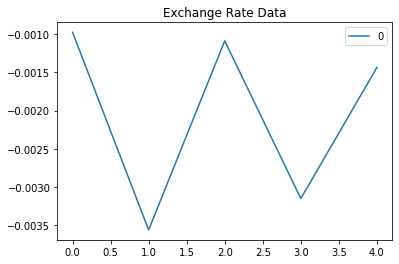

In [64]:
# Plot the 5 Day Returns Forecast
# YOUR CODE HERE!

pd.DataFrame(results.forecast(steps=5)[0]).plot(title="Exchange Rate Data")

#### Question: Based on the p-value, is the model a good fit?

##### The model is not a good fit given the p-value exceeds 0.05.

## Forecasting the Exchange Rate Price using an ARIMA Model

In [72]:
from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
# YOUR CODE HERE!

model = ARIMA(cad_jpy_df['Price'], order=(5, 1, 1))

# Fit the model
# YOUR CODE HERE!

results = model.fit()

In [73]:
# Output model summary results:
# YOUR CODE HERE!

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                 7928
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -8745.622
Method:                       css-mle   S.D. of innovations              0.729
Date:                Wed, 25 Nov 2020   AIC                          17507.244
Time:                        14:51:13   BIC                          17563.070
Sample:                             1   HQIC                         17526.361
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0058      0.008     -0.743      0.458      -0.021       0.009
ar.L1.D.Price     0.4287      0.246      1.740      0.082      -0.054       0.912
ar.L2.D.Price     0.0177      0.014      1.264      0.206      -0.010       0.045
ar.L3.D.Price    -0.0118      0.012     -0.959      0.337      -0.036       0.012
ar.L4.D.Price     0.0110      0.012      0.879      0.379      -0.013       0.035
ar.L5.D.Price    -0.0191      0.011     -1.702      0.089      -0.041       0.003
ma.L1.D.Price    -0.4568      0.246     -1.855      0.064      -0.939       0.026
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7660           -0.7702j            1.9266           -0.0655
AR.2            1.7660           +0.7702j            1.9266            0.0655
AR.3           -2.3649           -0.0000j            2.3649           -0.5000
AR.4           -0.2974           -2.4212j            2.4394           -0.2695
AR.5           -0.2974           +2.4212j            2.4394            0.2695
MA.1            2.1893           +0.0000j            2.1893            0.0000
-----------------------------------------------------------------------------
"""

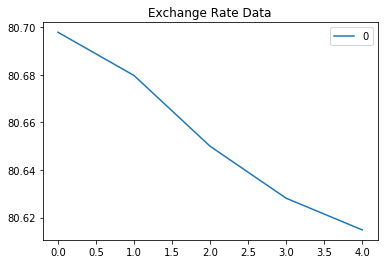

In [74]:
# Plot the 5 Day Price Forecast
# YOUR CODE HERE!

pd.DataFrame(results.forecast(steps=5)[0]).plot(title="Exchange Rate Data")

#### Question: What does the model forecast will happen to the Japanese Yen in the near term?

#### As per the model forecast in the near term Japanese Yen is going to see a downward trend.

##  Volatility Forecasting with GARCH

In [76]:
import arch as arch

In [87]:
# Estimate a GARCH model:
# YOUR CODE HERE!

from arch import arch_model
model = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)

# Fit the model
# YOUR CODE HERE!

res = model.fit(disp="off")
print(res)

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8911.02
Distribution:                  Normal   AIC:                           17830.0
Method:            Maximum Likelihood   BIC:                           17858.0
                                        No. Observations:                 7928
Date:                Wed, Nov 25 2020   Df Residuals:                     7924
Time:                        16:06:57   Df Model:                            4
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.0733e-03  2.545e-03      3.566  3.628e-04 

In [88]:
# Summarize the model results
# YOUR CODE HERE!

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8911.02
Distribution:                  Normal   AIC:                           17830.0
Method:            Maximum Likelihood   BIC:                           17858.0
                                        No. Observations:                 7928
Date:                Wed, Nov 25 2020   Df Residuals:                     7924
Time:                        16:06:57   Df Model:                            4
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.0733e-03  2.545e-03      3.566  3.628e-04  [4.086e-03,1.406e-02]
alpha[1]       0.0624  1.835e-02      3.402  6.682e-04  [2.647e-02,9.841e-02]
alpha[2]       0.0000  2.010e-02      0.000      1.000 [-3.940e-02,3.940e-02]
beta[1]        0.9243  1.229e-02     75.205      0.000      [  0.900,  0.948]
=============================================================================

Covariance estimator: robust
"""

In [89]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day 

'2020-06-04'

In [90]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
# YOUR CODE HERE!

forecasts = res.forecast(start='2020-06-04', horizon=forecast_horizon)
forecasts

In [91]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.566035,12.573725,12.581308,12.588786,12.596161


In [92]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2020-06-04
h.1,12.566035
h.2,12.573725
h.3,12.581308
h.4,12.588786
h.5,12.596161


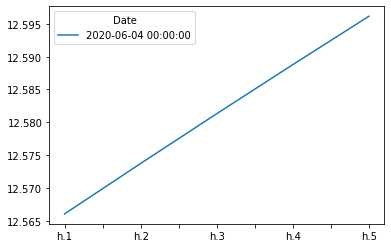

In [93]:
# Plot the final forecast
# YOUR CODE HERE!

final.plot()

#### Question: What does the model forecast will happen to volatility in the near term?

#### Volatility is supposed to increase in the near term.

## Conclusions

### 1. Based on your time series analysis, would you buy the yen now?

#### Since the volatility of yen is going to increase in near future, I would not prefer to buy yen.

### 2. Is the risk of the yen expected to increase or decrease?

#### The risk of yen is expected to increase. 

### 3. Based on the model evaluation, would you feel confident in using these models for trading?

#### Yes, I would feel confident in using these models for trading since these models has a strong potential for short-term prediction.